# Fine Tech 
(Liked or Not)

### Importing Libraries

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from os import system
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek

## Used for ignoring warning
import warnings
warnings.simplefilter("ignore")
## settign rows to max
pd.set_option("display.max_columns",None)

In [55]:
df = pd.read_csv("FineTech_appData.csv")

In [56]:
for i in range(len(df["screen_list"])):
    df["screen_list"][i] = len(df["screen_list"][i].split(","))

##### Checking Null Values

In [57]:
print(df.isnull().sum())

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64


In [58]:
for i in df.columns:
    print(i,"---->",len(df[i].unique()))

user ----> 49874
first_open ----> 49747
dayofweek ----> 7
hour ----> 24
age ----> 78
screen_list ----> 55
numscreens ----> 151
minigame ----> 2
used_premium_feature ----> 2
enrolled ----> 2
enrolled_date ----> 31002
liked ----> 2


### Required Data

In [59]:
x_cleaning = df.drop(columns=["user","first_open","enrolled_date","liked"],axis=1)
y = df["liked"].values

### Label Encoding

In [60]:
lb = LabelEncoder()
label_data = lb.fit_transform(x_cleaning["hour"])
label_data = label_data.reshape((50000,1))
label_data = pd.DataFrame(label_data,columns=["hour"])

#updating to dataset
x_cleaning.update(label_data)

In [61]:
x_cleaning.columns

Index(['dayofweek', 'hour', 'age', 'screen_list', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled'],
      dtype='object')

### Standard Scaler

In [62]:
sc = StandardScaler()
X = sc.fit_transform(x_cleaning)

### Data Checking

[]

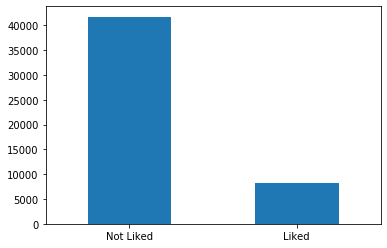

In [63]:
checking = pd.value_counts(y,sort=True)
checking.plot(kind='bar',rot=0)
plt.xticks(range(2),["Not Liked","Liked"])
plt.plot()

### Data Equalizer

In [64]:
liked_ = df[df["liked"]==1]
not_liked_ = df[df["liked"]==0]
print("Not Liked data->",liked_.shape,"\nLiked data->",not_liked_.shape)

Not Liked data-> (8250, 12) 
Liked data-> (41750, 12)


In [65]:
smt = SMOTETomek(random_state =42)
X_res,y_res = smt.fit_sample(X,y)

In [66]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 41750, 1: 8250})
Resampled dataset shape Counter({0: 40485, 1: 40485})


### Model Creation

###### Logistic Regression

In [77]:
def logistic(X_res,y_res):
    X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.3,random_state =21)
    lr = LogisticRegression()
    model = lr.fit(X_train,y_train)
    return [model,model.score(X_test,y_test),X_test,y_test]

###### Support Vector Machine

In [78]:
def support(X_res,y_res):
    X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.3,random_state =12)
    svc = SVC(kernel="linear")
    model = svc.fit(X_train,y_train)
    return [model,model.score(X_test,y_test),X_test,y_test]


In [79]:
print("Select the option")
print("Logestic Regression Enter --> L")
print("Support Vector Classification Enter --> S")
select = input()
if select == "L":
    model,accuracy,X_test,y_test = logistic(X_res,y_res)
    print(f"Your Model is ready with the accuracy of-->{accuracy*100}%")
    print("Testing data is also ready")
elif select =="S":
    model,accuracy,X_test,y_test = support(X,y)
    print(f"Your Model is ready with the accuracy of-->{accuracy*100}%")
    print("Testing data is also ready")
else: 
    print("Correct Option")

Select the option
Logestic Regression Enter --> L
Support Vector Classification Enter --> S
L
Your Model is ready with the accuracy of-->50.60722078135935%
Testing data is also ready


In [13]:
select = int(input("Enter the value you want to test-->"))
system('cls')
if model.predict(X_test[select].reshape(1,-1))[0] ==0:
    print("Predicted data --> Not Liked")
else:
    print("Predicted data -->Liked")
if y_test[select] ==0:
    print("Original data --> Not Liked")
else:
    print("Original data -->Liked")

Enter the value you want to test-->10
Predicted data --> Not Liked
Original data -->Liked


#### Other Models

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.3,random_state =21)

In [93]:
from sklearn.metrics import confusion_matrix

### Naive_bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print("Increased Data Score-->",round(model.score(X_test,y_test),4)*100)
print("Original Data Score-->",round(model.score(X,y),4)*100)
pred = model.predict(X)
count =0
for i in pred:
    if i==1:
        count+=1
print("Predicted Liked-->",count)
count =0
for i in y_test:
    if i==1:
        count+=1
print("Original Liked-->",count)
pred = model.predict(X_test)
print("\n",confusion_matrix(y_test,pred))

Increased Data Score--> 51.1
Original Data Score--> 37.34
Predicted Liked--> 34824
Original Liked--> 12164

 [[3733 8394]
 [3484 8680]]


### DecisionTress

In [98]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Increased Data Score-->",round(model.score(X_test,y_test),4)*100)
print("Original Data Score-->",round(model.score(X,y),4)*100)
pred = model.predict(X)
count =0
for i in pred:
    if i==1:
        count+=1
print("Predicted Liked-->",count)
count =0
for i in y_test:
    if i==1:
        count+=1
print("Original Liked-->",count)
pred = model.predict(X_test)
print("\n",confusion_matrix(y_test,pred))

Increased Data Score--> 81.67999999999999
Original Data Score--> 90.81
Predicted Liked--> 9001
Original Liked--> 12164

 [[ 9766  2361]
 [ 2088 10076]]


### RandomForest

In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
print("Increased Data Score-->",round(model.score(X_test,y_test),4)*100)
print("Original Data Score-->",round(model.score(X,y),4)*100)
pred = model.predict(X)
count =0
for i in pred:
    if i==1:
        count+=1
print("Predicted Liked-->",count)
count =0
for i in y_test:
    if i==1:
        count+=1
print("Original Liked-->",count)
pred = model.predict(X_test)
print("\n",confusion_matrix(y_test,pred))

Increased Data Score--> 89.45
Original Data Score--> 94.46
Predicted Liked--> 6974
Original Liked--> 12164

 [[11563   564]
 [ 1999 10165]]


### Neural Net

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [125]:
model = Sequential()
model.add(Dense(310,activation="relu",input_shape=(8,)))
model.add(Dropout(.5))
model.add(Dense(90,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss= "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
his =model.fit(X_res,y_res,epochs=10,validation_split=.3,batch_size=10)

Epoch 1/10
5668/5668 [==============================] - 7s 1ms/step - loss: 3.4060e-08 - accuracy: 0.4174 - val_loss: 1.1921e-07 - val_accuracy: 0.9772
Epoch 2/10
5668/5668 [==============================] - 6s 1ms/step - loss: 3.4060e-08 - accuracy: 0.4242 - val_loss: 1.1921e-07 - val_accuracy: 0.9772
Epoch 3/10
5668/5668 [==============================] - 6s 1ms/step - loss: 3.4060e-08 - accuracy: 0.4186 - val_loss: 1.1921e-07 - val_accuracy: 0.9772
Epoch 4/10
5668/5668 [==============================] - 6s 1ms/step - loss: 3.4060e-08 - accuracy: 0.4191 - val_loss: 1.1921e-07 - val_accuracy: 0.9772
Epoch 5/10
5668/5668 [==============================] - 6s 1ms/step - loss: 3.4060e-08 - accuracy: 0.4186 - val_loss: 1.1921e-07 - val_accuracy: 0.9772
Epoch 6/10
5668/5668 [==============================] - 7s 1ms/step - loss: 3.4060e-08 - accuracy: 0.4200 - val_loss: 1.1921e-07 - val_accuracy: 0.9772
Epoch 7/10
5668/5668 [==============================] - 6s 1ms/step - loss: 3.4060e-08 -